Saving earthquake_alert_balanced_dataset.csv to earthquake_alert_balanced_dataset.csv
magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64
(1300, 6)


/tmp/ipython-input-2836106640.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['alert'] = df['alert'].replace({
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


========== BASELINE MODEL PERFORMANCE ==========
Logistic Regression Accuracy: 0.6346153846153846
Decision Tree Accuracy: 0.8846153846153846

Logistic Regression MAE: 0.4230769230769231
Decision Tree MAE: 0.15

========== ADVANCED MODEL PERFORMANCE ==========
Random Forest Accuracy: 0.9115384615384615
Gradient Boosting Accuracy: 0.9153846153846154

Random Forest MAE: 0.10384615384615385
Gradient Boosting MAE: 0.11153846153846154

========== CROSS VALIDATION RESULTS ==========
Random Forest CV Mean: 0.9138461538461538
Gradient Boosting CV Mean: 0.8853846153846154

========== GRID SEARCH RESULTS ==========
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8913533563214561


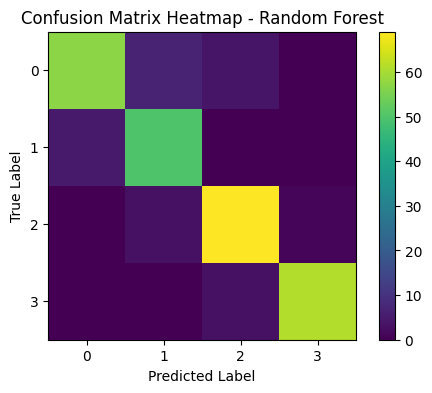

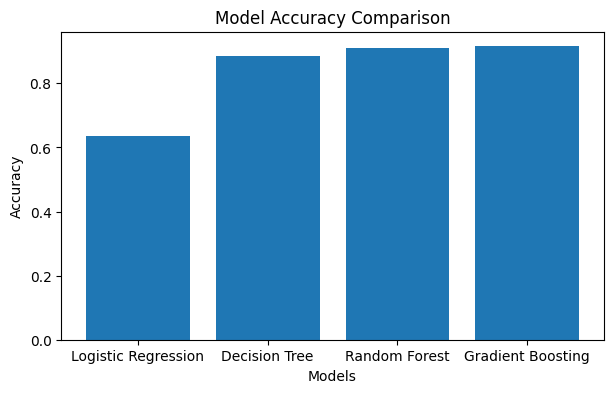

In [1]:
# ==================== IMPORT LIBRARIES ==================== #

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# ==================== DATA UPLOAD ==================== #

uploaded = files.upload()     # Select your CSV file when popup opens

# Load dataset (file name must match the uploaded file)
df = pd.read_csv("earthquake_alert_balanced_dataset.csv")
df.head()

# ==================== PREPROCESSING ==================== #

# Convert labels (alert column)
df['alert'] = df['alert'].replace({
    'green': 0,
    'yellow': 1,
    'orange': 2,
    'red': 3
})

# Drop non-numeric columns
df = df.drop(['place','location','type','title','net','id','time','updated'], axis=1, errors='ignore')

# Remove missing values
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

# Split features & labels
X = df.drop("alert", axis=1)
y = df["alert"]

# Label encoding if required
le = LabelEncoder()
y = le.fit_transform(y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==================== BASELINE TRAINING ==================== #

log_model = LogisticRegression(max_iter=500)
dt_model = DecisionTreeClassifier()

log_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Predictions
log_pred = log_model.predict(X_test)
dt_pred = dt_model.predict(X_test)

print("========== BASELINE MODEL PERFORMANCE ==========")
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nLogistic Regression MAE:", mean_absolute_error(y_test, log_pred))
print("Decision Tree MAE:", mean_absolute_error(y_test, dt_pred))

# ==================== ADVANCED MODEL TRAINING ==================== #

rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

print("\n========== ADVANCED MODEL PERFORMANCE ==========")
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print("\nRandom Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("Gradient Boosting MAE:", mean_absolute_error(y_test, gb_pred))

# ==================== CROSS VALIDATION ==================== #

rf_cv = cross_val_score(rf_model, X, y, cv=5)
gb_cv = cross_val_score(gb_model, X, y, cv=5)

print("\n========== CROSS VALIDATION RESULTS ==========")
print("Random Forest CV Mean:", rf_cv.mean())
print("Gradient Boosting CV Mean:", gb_cv.mean())

# ==================== HYPERPARAMETER TUNING ==================== #

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,
                    cv=3, scoring='accuracy')

grid.fit(X_train, y_train)

print("\n========== GRID SEARCH RESULTS ==========")
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# ==================== CONFUSION MATRIX HEATMAP ==================== #

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix Heatmap - Random Forest")
plt.colorbar()

tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ==================== ACCURACY COMPARISON GRAPH ==================== #

model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, gb_pred)
]

plt.figure(figsize=(7,4))
plt.bar(model_names, accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()
